In [1]:
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def generate_polygon(n, m):
    num_vertices = n
    num_points = m

    angles = np.linspace(0, 2*np.pi, num_vertices+1, endpoint=True)
    x = 0.5 * np.cos(angles[:-1]) + 0.5
    y = 0.5 * np.sin(angles[:-1]) + 0.5

    points = np.zeros((num_points, 2))
    for i in range(num_vertices):
        start = i * (num_points // num_vertices)
        end = (i + 1) * (num_points // num_vertices)
        points[start:end, 0] = np.linspace(x[i], x[(i+1)%num_vertices], num_points // num_vertices, endpoint=False)
        points[start:end, 1] = np.linspace(y[i], y[(i+1)%num_vertices], num_points // num_vertices, endpoint=False)

    # Sort the points in clockwise order
    centroid = np.mean(points, axis=0)
    points_angles = np.arctan2(points[:,1] - centroid[1], points[:,0] - centroid[0])
    sorted_indices = np.argsort(points_angles)
    polygon = points[sorted_indices]

    # Ensure the polygon is closed
#     polygon = np.concatenate((polygon, np.array([polygon[0]])), axis=0)

    return polygon


In [3]:
def morph(x1, y1, x2, y2, alpha): 
    xm = alpha * x1 + (1-alpha) * x2 
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym



In [4]:
tri = generate_polygon(3, 840)
sqr = generate_polygon(4, 840)
pen = generate_polygon(5, 840)
hexx = generate_polygon(6, 840)
sept = generate_polygon(7, 840)
octa = generate_polygon(8, 840)

xt,yt = tri[:,0],tri[:,1]
xs,ys = sqr[:,0],sqr[:,1]
xp,yp = pen[:,0],pen[:,1]
xh,yh = hexx[:,0],hexx[:,1]
xse,yse = sept[:,0],sept[:,1]
xo,yo = octa[:,0],octa[:,1]

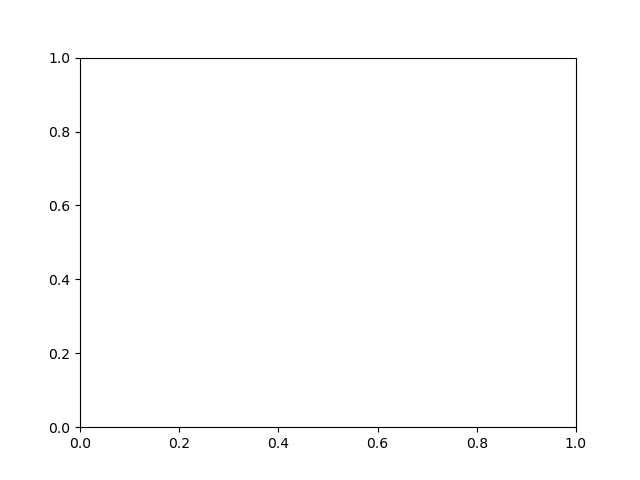

In [5]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [],'r')


def init(): 
    ax.set_xlim([0, 1]) 
    ax.set_ylim([0,1]) 
    return ln,

def update(frame):
    if 0 <= frame < 0.2:
        # Morph from triangle to square
        t = (frame)*5
        xdata, ydata = morph(xs, ys, xt, yt, t)
    elif 0.2 <= frame < 0.4:
        # Morph from square to pentagon
        t = (frame-0.2)*5
        xdata, ydata = morph(xp, yp, xs, ys, t)
    elif 0.4 <= frame < 0.6:
        # Morph from pentagon to hexagon
        t = (frame-0.4)*5
        xdata, ydata = morph(xh, yh, xp, yp, t)
    elif 0.6 <= frame < 0.8:
        # Morph from hexagon to septagon
        t = (frame-0.6)*5
        xdata, ydata = morph(xse, yse, xh, yh, t)
    elif 0.8 <= frame < 1.0:
        # Morph from septagon to octagon
        t = (frame-0.8)*5
        xdata, ydata = morph(xo, yo, xse, yse, t)
    elif 1.0 <= frame < 1.2:
        # Morph from octagon to septagon
        t = (frame-1.0)*5
        xdata, ydata = morph(xse, yse, xo, yo, t)
    elif 1.2 <= frame < 1.4:
        # Morph from septagon to hexagon
        t = (frame-1.2)*5
        xdata, ydata = morph(xh, yh, xse, yse, t)
    elif 1.4 <= frame < 1.6:
        # Morph from hexagon to pentagon
        t = (frame-1.4)*5
        xdata, ydata = morph(xp, yp, xh, yh, t)
    elif 1.6 <= frame < 1.8:
        # Morph from pentagon to square
        t = (frame-1.6)*5
        xdata, ydata = morph(xs, ys, xp, yp, t)
    else:
        # Morph from square to triangle
        t = (frame-1.8)*5
        xdata, ydata = morph(xt, yt, xs, ys, t)
    ln.set_data(xdata, ydata)
    return ln


# print(f"Square: {np.shape(xs)}")
anim = FuncAnimation(fig, update, frames=np.linspace(0, 2, 500), blit=True,interval=10,repeat=True)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.show()

In [6]:
sqr

array([[0.00238095, 0.49761905],
       [0.0047619 , 0.4952381 ],
       [0.00714286, 0.49285714],
       ...,
       [0.0047619 , 0.5047619 ],
       [0.00238095, 0.50238095],
       [0.        , 0.5       ]])

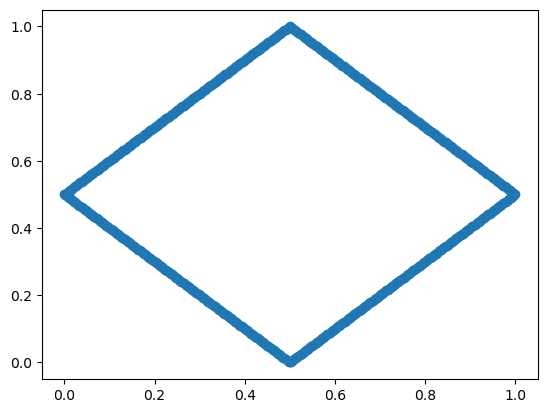

In [12]:
%matplotlib inline
plt.plot(sqr[:,0],sqr[:,1],'o')